In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv', index_col='Unnamed: 0')

In [22]:
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


** Task 1 **

** Part a **

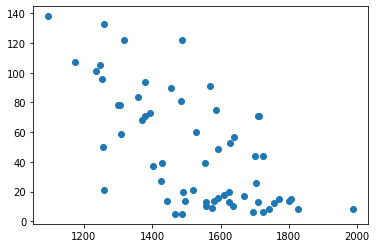

In [37]:
plt.scatter(df.mortality, df.hardness)

** Part b **

In [57]:
pearson_coef = pearsonr(df.mortality, df.hardness)
print(f'Коэффициент Пирсона :{pearson_coef[0]:.5}')

Коэффициент Пирсона :-0.65485


In [54]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [58]:
spearman_coef = spearmanr(df.mortality, df.hardness)
print(f'Коэффициент Спирмана :{spearman_coef[0]:.5}')

Коэффициент Спирмана :-0.63166


In [55]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


** Part C **

In [3]:
X = df[['mortality']].values
y = df['hardness'].values

In [29]:
slr = LinearRegression().fit(X,y)
print(f'R2: {slr.score(X,y):.5}')
y_pred = slr.predict(X)
print(f'Coef: {slr.coef_[0]:.5}')
print(f'Intercept: {slr.intercept_:.5}')

R2: 0.42883
Coef: 0.0
Intercept: 249.78


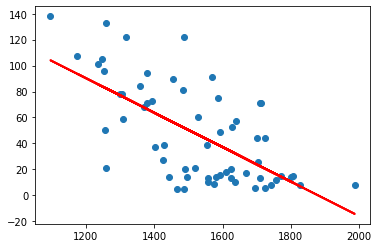

In [18]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red', linewidth=2)

In [18]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [19]:
X = sm.add_constant(X)

In [34]:
model = sm.OLS(y, X)
results = model.fit()
print(f'Parameters: {results.params[0]:.5}; {results.params[1]:.5}')
print(f'R2: {results.rsquared:.5}')

Parameters: 249.78; -0.13292
R2: 0.42883


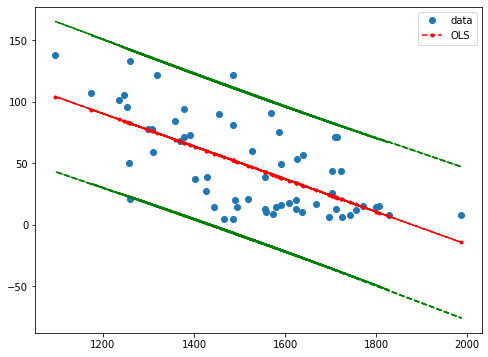

In [35]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

** Task 2 **

In [9]:
df_south = df.loc[df.location == 'South'].copy()
df_north = df.loc[df.location == 'North'].copy()

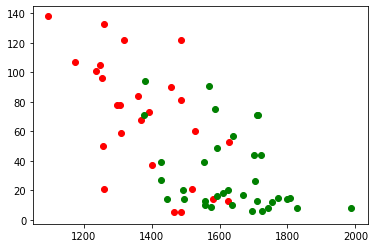

In [42]:
plt.scatter(df_south.mortality, df_south.hardness, color='red')
plt.scatter(df_north.mortality, df_north.hardness, color='green')

In [40]:
pearson_coef_south = pearsonr(df_south.mortality, df_south.hardness)
pearson_coef_north = pearsonr(df_north.mortality, df_north.hardness)
print(f'Коэффициент Пирсона южных городов:{pearson_coef_south[0]:.3}')
print(f'Коэффициент Пирсона северных городов:{pearson_coef_north[0]:.3}')

Коэффициент Пирсона южных городов:-0.602
Коэффициент Пирсона северных городов:-0.369


In [44]:
spearman_coef_south = spearmanr(df_south.mortality, df_south.hardness)
spearman_coef_north = spearmanr(df_north.mortality, df_north.hardness)
print(f'Коэффициент Спирмана южных городов:{spearman_coef_south[0]:.3}')
print(f'Коэффициент Спирмана северных городов:{spearman_coef_north[0]:.3}')

Коэффициент Спирмана южных городов:-0.596
Коэффициент Спирмана северных городов:-0.404


In [17]:
X_south = df_south[['mortality']].values
y_south = df_south['hardness'].values

X_north = df_north[['mortality']].values
y_north = df_north['hardness'].values

slr_south = LinearRegression().fit(X_south,y_south)
slr_north = LinearRegression().fit(X_north,y_north)

print(f'R2 южный: {slr_south.score(X_south,y_south):.5}')
print(f'R2 северный: {slr_north.score(X_north,y_north):.5}')

y_pred_south = slr.predict(X_south)
y_pred_north = slr.predict(X_north)

print(f'Coef южный: {slr_south.coef_[0]:.5}')
print(f'Intercept южный: {slr_south.intercept_:.5}')
print(f'Coef северный: {slr_north.coef_[0]:.5}')
print(f'Intercept северный: {slr_north.intercept_:.5}')

R2 южный: 0.36259
R2 северный: 0.13586
Coef южный: -0.17326
Intercept южный: 308.32
Coef северный: -0.070347
Intercept северный: 145.32


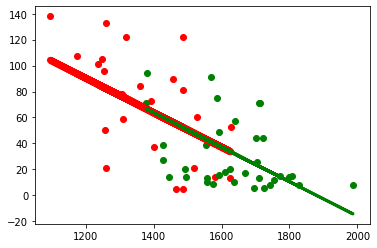

In [38]:
plt.scatter(df_south.mortality, df_south.hardness, color='red')
plt.scatter(df_north.mortality, df_north.hardness, color='green')
plt.plot(X_south, y_pred_south, color='red', linewidth=7)
plt.plot(X_north, y_pred_north, color='green', linewidth=3)